In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics

In [3]:
data=pd.read_csv("Train_data.csv")

In [4]:
data["loudness"]= (data["loudness"]-data["loudness"].min())/(data["loudness"].max()-data["loudness"].min())
data["duration-min"]= (data["duration-min"]-data["duration-min"].min())/(data["duration-min"].max()-data["duration-min"].min())
data["tempo"]= (data["tempo"]-data["tempo"].min())/(data["tempo"].max()-data["tempo"].min())
data['explicit'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
data['mode'].replace(to_replace=['Major','Minor'], value=[1,0], inplace=True)
release_date = data['release_date'].str.split('-',expand = True)
data['release_day'] = pd.to_numeric(release_date[0])
data['release_month'] = pd.to_numeric(release_date[1])
data['release_year'] = pd.to_numeric(release_date[2])
data.drop(columns =["release_date"], inplace = True) 
data.drop(columns =["year"], inplace = True) 

In [5]:
factor = pd.factorize(data['popularity'])
data['popularity'] = factor[0]
definition = factor[1]

In [6]:
data['popularity'] = data['popularity'] + 1

In [7]:
data

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,popularity,release_day,release_month,release_year
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,0.0381,0.511144,0.03980,0.038567,1,1,1,1947
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,0.0437,0.701272,0.85900,0.030303,2,13,11,2020
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,0.0474,0.498075,0.70900,0.033058,1,1,1,1950
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,0.0368,0.385698,0.96400,0.030303,2,30,4,1974
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,0.0488,0.540760,0.78500,0.044077,3,1,1,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,0.4070,0.377877,0.74400,0.044077,3,1,7,2014
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,0.0351,0.618000,0.70100,0.024793,5,1,1,1959
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,0.0338,0.575914,0.89000,0.031680,2,1,1,1984
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,0.1180,0.337728,0.00558,0.039945,4,9,1,2017


In [8]:
# Keep the value 1 if it is greater than 15 and 0 is less
def time_of_month(num):
    if num > 15:
        return 1
    else:
        return 0
    
timeOM = data['release_day'].apply(time_of_month)

In [9]:
data['time_of_month'] = timeOM

In [10]:
# Keep the value 1 for winter 2 for summer 3 for Rainy/Autumn
def time_of_year(num):
    if num in [1,2,11,12]:
        return 1
    elif num in [3,4,5,6]:
        return 2
    else:
        return 3
    
timeOY = data['release_month'].apply(time_of_year)

In [11]:
data['time_of_year'] = timeOY

In [12]:
data.drop(columns =["release_day"], inplace = True) 
data.drop(columns =["release_month"], inplace = True) 

In [13]:
popularity = data['popularity']
data.drop(columns =["popularity"], inplace = True)
data['popularity'] = popularity

<AxesSubplot:>

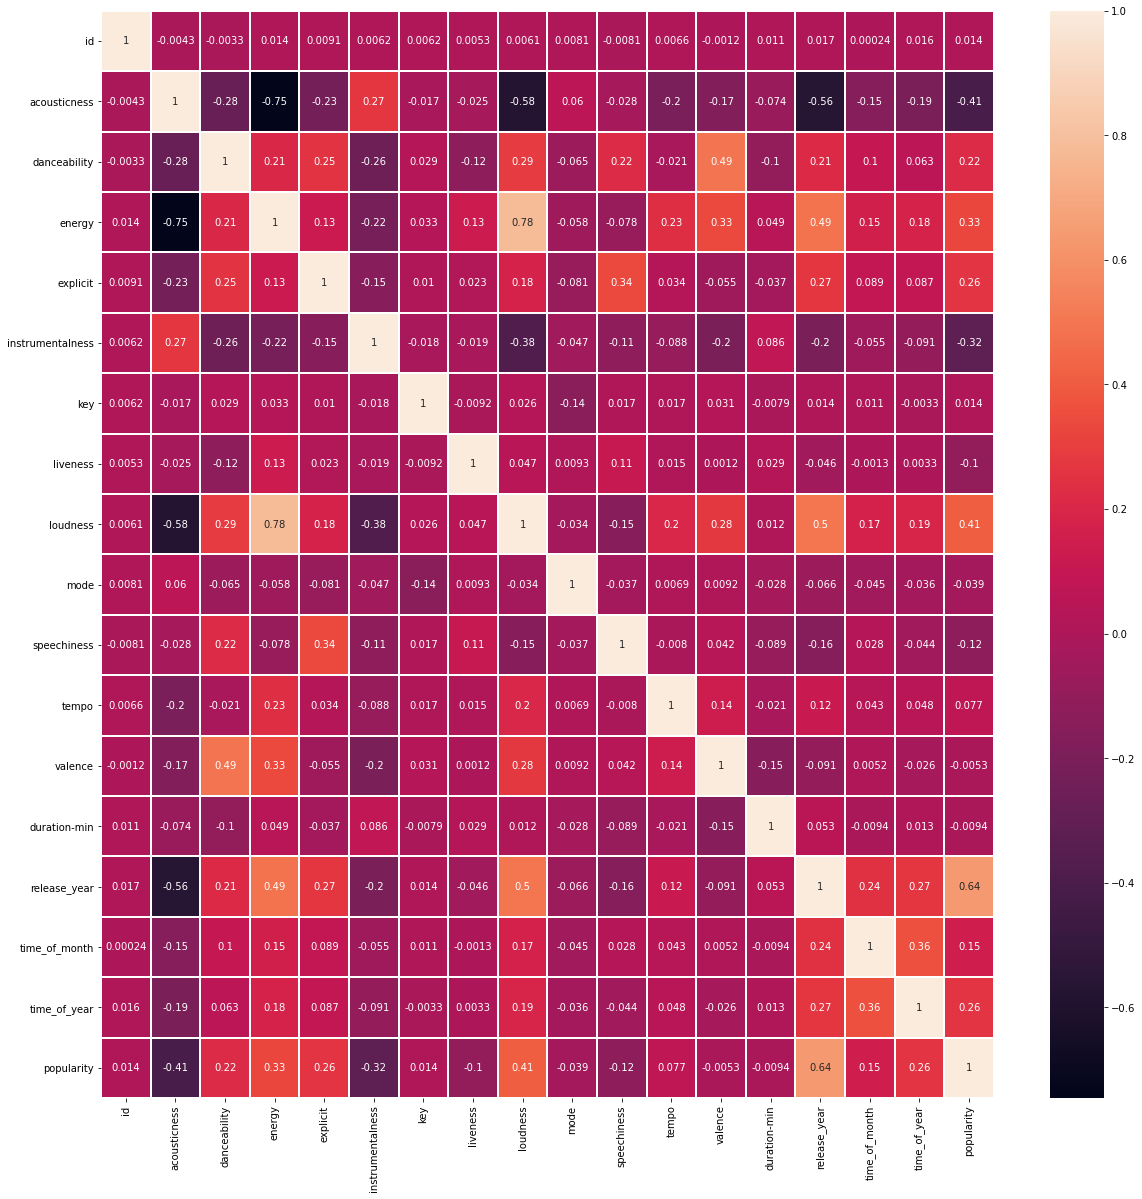

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=1,fmt='.2g')

In [15]:
Y = data['popularity']
X = data.drop("popularity",axis=1)
X

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,release_year,time_of_month,time_of_year
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,0.0381,0.511144,0.03980,0.038567,1947,0,1
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,0.0437,0.701272,0.85900,0.030303,2020,0,1
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,0.0474,0.498075,0.70900,0.033058,1950,0,1
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,0.0368,0.385698,0.96400,0.030303,1974,1,2
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,0.0488,0.540760,0.78500,0.044077,1973,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,0.4070,0.377877,0.74400,0.044077,2014,0,3
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,0.0351,0.618000,0.70100,0.024793,1959,0,1
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,0.0338,0.575914,0.89000,0.031680,1984,0,1
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,0.1180,0.337728,0.00558,0.039945,2017,0,1


In [34]:
X_train,X_CV,Y_train,Y_CV=train_test_split(X,Y,test_size=0.1,random_state=50)

In [35]:
# Random forest classifier

clf = RandomForestClassifier(n_estimators = 100)   
clf.fit(X_train, Y_train) 
  
y_pred = clf.predict(X_CV)

In [36]:
print(metrics.classification_report(Y_CV, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81       335
           2       0.57      0.72      0.64       311
           3       0.49      0.41      0.45       282
           4       0.66      0.60      0.63       262
           5       0.50      0.18      0.27        33

    accuracy                           0.64      1223
   macro avg       0.61      0.55      0.56      1223
weighted avg       0.63      0.64      0.63      1223



In [19]:
data

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration-min,release_year,time_of_month,time_of_year,popularity
0,2015,0.9490,0.2350,0.0276,0,0.927000,5,0.513,0.365189,1,0.0381,0.511144,0.03980,0.038567,1947,0,1,1
1,15901,0.8550,0.4560,0.4850,0,0.088400,4,0.151,0.752995,1,0.0437,0.701272,0.85900,0.030303,2020,0,1,2
2,9002,0.8270,0.4950,0.4990,0,0.000000,0,0.401,0.798520,0,0.0474,0.498075,0.70900,0.033058,1950,0,1,1
3,6734,0.6540,0.6430,0.4690,0,0.108000,7,0.218,0.621782,1,0.0368,0.385698,0.96400,0.030303,1974,1,2,2
4,15563,0.7380,0.7050,0.3110,0,0.000000,5,0.322,0.701636,1,0.0488,0.540760,0.78500,0.044077,1973,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0,0.000000,1,0.353,0.855467,1,0.4070,0.377877,0.74400,0.044077,2014,0,3,3
12223,1701,0.9120,0.4510,0.2400,0,0.000002,1,0.175,0.664313,1,0.0351,0.618000,0.70100,0.024793,1959,0,1,5
12224,3351,0.3280,0.5510,0.5640,0,0.002950,2,0.352,0.769712,0,0.0338,0.575914,0.89000,0.031680,1984,0,1,2
12225,8879,0.1220,0.0608,0.9390,0,0.991000,1,0.912,0.389192,1,0.1180,0.337728,0.00558,0.039945,2017,0,1,4


In [20]:
from numpy import cov
from scipy.stats import pearsonr

In [21]:
# Between Explicit and Popularity & Energy and Populairy
print(cov(data['explicit'], data['popularity'])[0,1], cov(data['energy'], data['popularity'])[0,1])

0.09502618489963773 0.10105780420408085


In [22]:
cov(data['explicit'], data['energy'])[0,1]

0.010212634621133912

In [23]:
# Pearson correlation between explicit and Popularity
corr, _ = pearsonr(data['explicit'] , data['popularity'])
corr

0.260152589794596

In [24]:
# Pearson correlation between explicit and Popularity
corr, _ = pearsonr(data['energy'] , data['popularity'])
corr

0.3272176437913146

In [25]:
# Pearson correlation between explicit and Popularity
corr, _ = pearsonr(data['explicit'] , data['energy'])
corr

0.1253302143782803

In [26]:
# Energy and Explicit have decent correlation and covariance with the target variable
# And less correlation amongst themselves

In [27]:
corr, _ = pearsonr(data['release_year'] , data['popularity'])
corr

0.6354933220649182